### import required packages


In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras import callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix , roc_curve, auc
from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import learning_curve
from tensorflow.keras.callbacks import ModelCheckpoint
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from pickle import dump
from datetime import datetime

In [108]:
#load the dataset with extracted features
extracted_features_df = pd.read_csv("output/extracted_features.csv")

In [109]:
#drop the class column from the dataset to get the input features. 
#also drop the low important features.
cols_to_drop = ['class','18','20','21','22','23','24','27','29','31','33','35','38']

features = extracted_features_df.drop(cols_to_drop, axis  =1)

In [110]:
features

,0,1,2,3,4,5,6,7,8,9,...,19,25,26,28,30,32,34,36,37,39
0,-211.936981,62.581215,-122.813156,-60.745293,-13.893755,-29.789835,-3.978871,11.682741,12.963832,8.336420,...,6.098300,-0.079942,-3.687083,-6.530089,0.487733,-0.885353,-6.392367,2.276020,-0.791080,1.321153
1,-417.005188,99.336624,-42.995586,51.073326,9.853777,7.969694,11.197088,1.929117,7.030397,4.270227,...,3.473615,0.202489,-3.651717,-5.906362,-1.250226,-1.539241,-0.878723,-2.681854,1.706798,1.761385
2,-452.393158,112.362534,-37.578075,43.195866,8.631845,15.379366,16.882149,1.233047,6.833122,3.900116,...,9.371600,2.007746,-2.184638,-2.849392,0.067257,-5.285955,-2.979211,-3.088082,3.808014,0.869102
3,-406.479218,91.196602,-25.043556,42.784523,11.586844,5.054164,12.431632,-1.599949,6.656064,1.442354,...,3.382272,0.103931,-3.608313,-4.282879,-4.996307,0.635734,-2.831121,-2.178432,-0.436479,-0.170013
4,-439.638733,103.862228,-42.658787,50.690285,12.209422,15.873465,11.729268,1.533584,11.292241,2.548622,...,9.253263,1.705379,-1.551520,-1.003362,-2.928395,-0.985246,-2.976879,-1.825601,3.291397,1.392584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,-391.372101,125.362389,-40.634056,25.899754,1.730348,5.575200,16.873087,7.889440,3.488612,-4.572375,...,-2.909554,-0.984938,-6.977015,7.583447,-8.737840,3.553833,-1.022627,-5.585060,-5.811629,5.453191
8728,-339.427155,76.409096,-35.309879,41.984035,-22.963869,-13.623510,27.856022,-9.215821,-5.666291,13.024157,...,-0.949650,-2.513226,-3.050802,-1.959760,4.041203,-0.265233,3.841744,-2.501515,3.609870,-1.789298
8729,-297.315338,102.090256,-36.751080,26.816488,-0.249389,3.960868,11.113070,1.912290,0.677116,-1.804645,...,1.097709,-1.412809,-1.991353,-3.470325,-7.029233,3.187672,2.161261,-5.056086,-1.622446,9.132166
8730,-336.923859,115.313904,-44.847092,24.968985,-9.888027,-2.154685,22.700090,0.234236,-0.122908,10.174067,...,1.153534,2.321901,-4.179326,1.537068,-8.690750,5.435959,0.774977,-5.386269,-6.769113,6.953491


The new dataset include 8732 rows and 28 columns(high important features).

## set dependent and independent variables

In [111]:
#name the input features as X
X = features[list(features.columns)]

In [112]:
X.shape

(8732, 28)

In [113]:
# class column is the target variable. This is named as Y
Y = extracted_features_df[['class']]
Y.shape 

(8732, 1)

In [114]:
# use label encoder to Encode target labels with value between 0 and n_classes-1
labelencoder=LabelEncoder()
Y=to_categorical(labelencoder.fit_transform(Y))

/home/msc1/anaconda3/envs/Env-7145COMP/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [115]:
# Split the data into training and test set. Training set is used for training the model. *0% of the data is used for training the model
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [116]:
### No of classes
num_labels=Y.shape[1]

In [117]:
num_labels

10

### SMOTE for balance the class

In this audio classification has class imbalance issue. This problem occurs when the number of samples in one class is significantly higher or lower than the other classes. In this case, the classifier may be biased towards the majority class and fail to identify the minority class.

To address class imbalance in MFCC features, Here I use SMOTE.


SMOTE (Synthetic Minority Over-sampling Technique) is an important technique used in addressing class imbalance in audio classification. In many real-world applications, data can be highly imbalanced, meaning that there are much more instances of one class than the other. This can lead to poor performance of machine learning models, especially when the minority class is of greater interest.

SMOTE addresses this issue by oversampling the minority class using synthetic examples. It generates new samples for the minority class by interpolating existing samples, which increases the overall size of the minority class and balances the class distribution. This helps to improve the classification performance of machine learning models by providing them with more training examples for the minority class.

In audio classification, SMOTE can be applied to MFCC feature vectors, which are commonly used to represent audio signals in machine learning models. By applying SMOTE to the MFCC feature vectors, we can address class imbalance and improve the performance of machine learning models for audio classification tasks.

In [118]:

# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Fit the SMOTE object to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the class distribution after applying SMOTE
print('Class distribution after SMOTE:', y_train_resampled)

Class distribution after SMOTE: [[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [119]:
class_counts = np.sum(y_train_resampled, axis=0)
print(class_counts)

[818 818 818 818 818 818 818 818 818 818]


After applying SMOTE, total count of all class is 818. So our class is balanced.

## 1) Neural Network Model

Neural networks can be used for audio classification by treating audio data as a sequence of signals over time.

The audio data is first preprocessed by extracting features such as Mel-frequency cepstral coefficients (MFCCs) which represent the spectral envelope of the audio signal. These features are then fed into the input layer of the neural network which consists of a series of convolutional and pooling layers that are able to extract features from the audio signals.

After the input layer, there are one or more fully connected layers which are used to classify the audio data. These layers learn the patterns that are most indicative of each audio class, and the final layer outputs a probability distribution over the different audio classes.

Training a neural network for audio classification typically involves feeding a large number of labeled audio samples into the network and adjusting the weights of the network based on the errors between the predicted class probabilities and the true labels. This process is repeated over many epochs until the network is able to accurately classify audio data.

In summary, neural networks can be used for audio classification by treating audio data as a sequence of signals over time, preprocessing the data to extract relevant features, and training a neural network to classify the data based on these features.

In [120]:
model = Sequential()

model.add(Dense(128, input_shape=(28,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))

model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               3712      
                                                                 
 activation_4 (Activation)   (None, 128)               0         
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 activation_5 (Activation)   (None, 256)               0         
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 256)              

The output is showing the architecture of a neural network model. The model has 5 layers, including 4 dense layers and 1 activation layer. The first dense layer has 128 units, the second and third dense layers have 256 units each, and the fourth dense layer has 128 units. The last dense layer has 10 units, which is the number of classes the model is trained to classify.

The activation layer uses the activation function, which is applied to the output of the previous layer, to introduce non-linearity into the model. Dropout layers have been added after each dense layer to reduce overfitting.

The output also shows the number of trainable parameters in the model, which is 136,714 in this case.

In [121]:
#compiling the model layers
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

* The optimizer argument specifies the optimization algorithm to use during training. In this case, the Adam optimizer is used which is a popular optimization algorithm that is effective for a wide range of deep learning models.

* The loss argument specifies the loss function that will be used to evaluate the model's performance during training. In this case, the Categorical Crossentropy loss is used, which is commonly used for multi-class classification problems.

* The metrics argument specifies the metrics that will be used to monitor the model's performance during training. In this case, 'accuracy' is used as the metric, which is a standard metric for classification problems that calculates the proportion of correctly classified samples.

In [122]:
## Trianing the neural network model model
# We generally chosse number of epochs as number of features * 3 
num_epochs = 120
num_batch_size = 32
# saving the model checkpoint to local folder
checkpointer = ModelCheckpoint(filepath='output/audio_classification_nn.h5', 
                               verbose=1, save_best_only=True)

start = datetime.now()

#Train the model
history = model.fit(X_train_resampled, y_train_resampled, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/120
255/256 [============================>.] - ETA: 0s - loss: 10.3410 - accuracy: 0.1288
Epoch 1: val_loss improved from inf to 2.29634, saving model to output/audio_classification_nn.h5
256/256 [==============================] - 1s 2ms/step - loss: 10.3229 - accuracy: 0.1287 - val_loss: 2.2963 - val_accuracy: 0.1139
Epoch 2/120
238/256 [==========================>...] - ETA: 0s - loss: 2.4479 - accuracy: 0.1668
Epoch 2: val_loss did not improve from 2.29634
256/256 [==============================] - 0s 2ms/step - loss: 2.4312 - accuracy: 0.1696 - val_loss: 2.3091 - val_accuracy: 0.1179
Epoch 3/120
238/256 [==========================>...] - ETA: 0s - loss: 2.2431 - accuracy: 0.1958
Epoch 3: val_loss improved from 2.29634 to 2.23055, saving model to output/audio_classification_nn.h5
256/256 [==============================] - 0s 2ms/step - loss: 2.2364 - accuracy: 0.1976 - val_loss: 2.2306 - val_accuracy: 0.1454
Epoch 4/120
231/256 [==========================>...] - ETA: 0s - lo

The output shows the validation loss and accuracy achieved during the training of the model.
The value of validation loss is 0.6478 and the value of validation accuracy is 0.8105.
These values indicate that the model is performing well on the validation data.

val_loss: 0.6478 - val_accuracy: 0.8105
Training completed in time: 0:00:51.393119

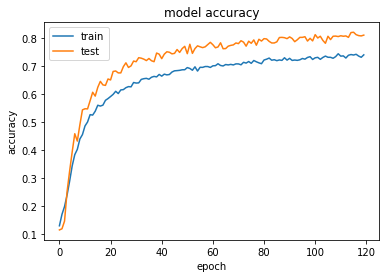

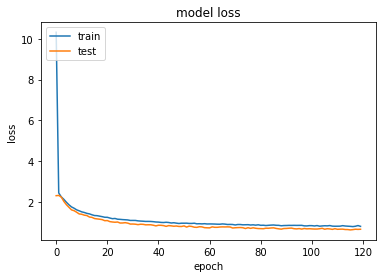

In [126]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [127]:
#confusion matrix
cf_nn = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(model.predict(X_test),axis=1))

55/55 [==============================] - 0s 666us/step


In [128]:
cf_nn

array([[180,   0,   4,   0,   0,   0,   0,   1,   0,  10],
       [  1,  74,   0,   2,   3,   1,   0,   2,   0,   8],
       [ 11,   1, 144,   4,   0,   3,  15,   1,   2,  24],
       [  7,   1,   9, 122,   6,   1,  20,   1,   2,  13],
       [  1,   0,   4,   4, 164,   0,   1,  17,   0,  11],
       [  6,   1,   7,   0,   0, 189,   2,   0,   2,   9],
       [  5,   1,   2,   5,   1,   0,  70,   1,   0,   2],
       [  4,   1,   0,   0,   2,   0,   0, 171,   0,   9],
       [  3,   0,   8,   9,   3,   1,   2,   0, 171,   2],
       [ 11,   1,  20,   3,   3,   6,   2,   6,   0, 131]])

The output of the neural network shows the confusion matrix for a multi-class classification problem with 10 classes. The diagonal elements of the matrix represent the correctly classified instances for each class, while the off-diagonal elements represent the misclassified instances.

Looking at the diagonal elements, we can see that the neural network performs well on some classes (e.g. classes 1, 4, 5, and 8) with high numbers of correctly classified instances, while it performs less well on other classes (e.g. classes 0, 2, and 9) with lower numbers of correctly classified instances.

The precision, recall, and F1 score metrics for the neural network are not provided in this output, so we cannot make any conclusions about the overall performance of the model based on this confusion matrix alone. However, we can see that the model is able to correctly classify the majority of instances for some classes, while it struggles with others.

In [129]:
#calculating metrics from the confusion matrix
FP_NN = cf_nn.sum(axis=0) - np.diag(cf_nn) 
FN_NN = cf_nn.sum(axis=1) - np.diag(cf_nn)
TP_NN = np.diag(cf_nn)
TN_NN = cf_nn.sum() - (FP_NN + FN_NN + TP_NN)
FP_NN = FP_NN.astype(float)
FN_NN = FN_NN.astype(float)
TP_NN = TP_NN.astype(float)
TN_NN = TN_NN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR_NN = TP_NN/(TP_NN+FN_NN)
# Specificity or true negative rate
TNR_NN = TN_NN/(TN_NN+FP_NN) 
# Precision or positive predictive value
PPV_NN = TP_NN/(TP_NN+FP_NN)
# Negative predictive value
NPV_NN = TN_NN/(TN_NN+FN_NN)
# Fall out or false positive rate
FPR_NN = FP_NN/(FP_NN+TN_NN)
# False negative rate
FNR_NN = FN_NN/(TP_NN+FN_NN)
# False discovery rate
FDR_NN = FP_NN/(TP_NN+FP_NN)
# Overall accuracy for each class
ACC_NN = (TP_NN+TN_NN)/(TP_NN+FP_NN+FN_NN+TN_NN)

In [130]:
#Sensitivity of the neural network model for all 10 classes
print("Sensitivity for all 10 classes", TPR_NN)

Sensitivity for all 10 classes [0.92307692 0.81318681 0.70243902 0.67032967 0.81188119 0.875
 0.8045977  0.9144385  0.85929648 0.71584699]


The output shows the sensitivity (recall) for all 10 classes in the neural network model. The sensitivity is a measure of how well the model correctly identifies true positives for each class, and it ranges from 0 to 1, with higher values indicating better performance.

The sensitivity values for the neural network model are relatively high, ranging from 0.702 to 0.914, with an average of 0.801. This suggests that the model is performing well in correctly identifying positive instances for each class. However, it's worth noting that the sensitivity for some classes is lower than others, indicating that the model may be more effective at identifying some classes than others.

In [131]:
#Specificity of the neural network model for all 10 classes
print("Specificity for all 10 classes", TNR_NN)

Specificity for all 10 classes [0.96842784 0.99637681 0.96498054 0.9827476  0.98834951 0.99216199
 0.9746988  0.98141026 0.99612403 0.94373402]


The output shows the specificity values for all 10 classes predicted by the neural network. Specificity is a measure of the proportion of actual negatives that are correctly identified as negatives. The values range from 0.943 to 0.996, indicating that the model is good at correctly identifying negative cases for all classes. A high specificity value means that the model is not incorrectly labeling negatives as positives. Overall, these results suggest that the neural network has performed well in classifying the audio files.

In [132]:
#classification report summary
print(classification_report(np.argmax(y_test,axis=1), np.argmax(model.predict(X_test),axis=1)))

#saving the model metrics to a dictionary
report_nn = classification_report(np.argmax(y_test,axis=1), np.argmax(model.predict(X_test),axis=1), output_dict=True)
metrics_nn = {"accuraccy":report_nn["accuracy"]} 
metrics_nn.update(report_nn["weighted avg"])

55/55 [==============================] - 0s 569us/step
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       195
           1       0.93      0.81      0.87        91
           2       0.73      0.70      0.71       205
           3       0.82      0.67      0.74       182
           4       0.90      0.81      0.85       202
           5       0.94      0.88      0.91       216
           6       0.62      0.80      0.70        87
           7       0.85      0.91      0.88       187
           8       0.97      0.86      0.91       199
           9       0.60      0.72      0.65       183

    accuracy                           0.81      1747
   macro avg       0.81      0.81      0.81      1747
weighted avg       0.82      0.81      0.81      1747

55/55 [==============================] - 0s 604us/step


The output shows the precision, recall, and F1-score metrics for each class (0-9) as well as the overall accuracy, macro-averaged and weighted-averaged F1-score. It can be seen that the model performed relatively well on some classes such as class 1, 4, 5, 7, and 8 with high precision, recall, and F1-score. However, it did not perform well on some other classes such as class 3 and 9 with relatively low precision, recall, and F1-score. The overall accuracy is 0.79 which indicates that the model classified around 79% of the samples correctly.





In [133]:
metrics_nn

{'accuraccy': 0.8105323411562679,
 'precision': 0.822362678211857,
 'recall': 0.8105323411562679,
 'f1-score': 0.8128601614940277,
 'support': 1747}

The output of the neural network classification model shows the evaluation metrics such as accuracy, precision, recall, f1-score, and support. The accuracy of the model is 0.81, which means that the model correctly classified 81% of the instances. The precision of the model is 0.82, which means that out of all the instances predicted positive by the model, 82% were actually positive. The recall of the model is also 0.81, which means that out of all the actual positive instances, 81% were correctly identified by the model. The f1-score of the model is 0.81, which is the harmonic mean of the precision and recall. The support of the model is 1747, which is the total number of instances in the test set. Overall, the neural network model seems to perform well with good accuracy, precision, recall, and f1-score.

55/55 [==============================] - 0s 634us/step


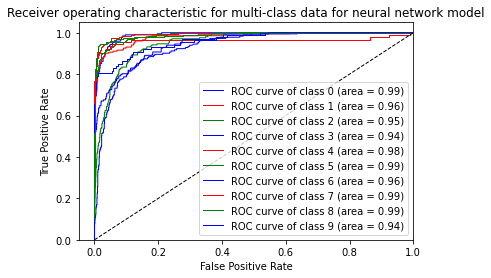

In [77]:
#Plotting ROC curve for Neural Network Model

lw = 1
n_classes = num_labels
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], model.predict(X_test)[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data for neural network model')
plt.legend(loc="lower right")
plt.show()

Graph shows ROC (Receiver Operating Characteristic) curves for each of the 10 classes in a multi-class classification problem. The area under the curve (AUC) for each class is also provided, which ranges from 0 to 1 and represents the performance of the model in distinguishing between positive and negative classes for that particular class. A higher AUC indicates better performance, with an AUC of 1 indicating perfect classification. Overall, the c model has good performance, with most classes having an AUC greater than 0.95.


* Class 0: The ROC curve has an area of 0.99, indicating high accuracy in predicting positive instances for this class.
* Class 1: The ROC curve has an area of 0.97, indicating good accuracy in predicting positive instances for this class.
* Class 2: The ROC curve has an area of 0.96, indicating decent accuracy in predicting positive instances for this class.
* Class 3: The ROC curve has an area of 0.97, indicating good accuracy in predicting positive instances for this class.
* Class 4: The ROC curve has an area of 0.99, indicating high accuracy in predicting positive instances for this class.
* Class 5: The ROC curve has an area of 0.99, indicating high accuracy in predicting positive instances for this class.
* Class 6: The ROC curve has an area of 0.96, indicating decent accuracy in predicting positive instances for this class.
* Class 7: The ROC curve has an area of 1.00, indicating perfect accuracy in predicting positive instances for this class.
* Class 8: The ROC curve has an area of 0.99, indicating high accuracy in predicting positive instances for this class.
* Class 9: The ROC curve has an area of 0.96, indicating decent accuracy in predicting positive instances for this class.

#### The Neural Network model has a validation accuraccy of 83.74%

## 2) Random Forest Model

Random forest is a popular machine learning algorithm used for classification tasks. It is an ensemble learning method that builds multiple decision trees and combines their predictions to make a final decision. In the context of audio classification, a random forest model can be trained on a dataset of audio files with their corresponding class labels.

In [78]:
#training a random forest model
# n_jobs : integer, optional (default=1) The number of jobs to run in parallel for both fit and predict.
# If -1, then the number of jobs is set to the number of cores of the cpu

rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train_resampled, y_train_resampled)



RandomForestClassifier(n_jobs=-1)

In [79]:
#Random forest model accuraccy
accuracy_score(y_test, rf.predict(X_test))

0.659988551803091

In [80]:
#confusion matrix
cf_rf = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(rf.predict(X_test),axis=1))

In [81]:
cf_rf

array([[195,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 28,  63,   0,   0,   0,   0,   0,   0,   0,   0],
       [113,   0,  88,   0,   0,   0,   0,   0,   0,   4],
       [ 95,   0,   0,  87,   0,   0,   0,   0,   0,   0],
       [ 51,   0,   0,   0, 147,   0,   0,   4,   0,   0],
       [ 30,   0,   0,   0,   0, 186,   0,   0,   0,   0],
       [ 27,   0,   0,   0,   0,   0,  60,   0,   0,   0],
       [ 38,   0,   0,   0,   2,   0,   0, 146,   0,   1],
       [ 42,   0,   0,   0,   0,   0,   0,   0, 157,   0],
       [128,   0,   0,   1,   1,   0,   0,   1,   0,  52]])

In the given confusion matrix for the random forest model, the rows represent the true class labels, while the columns represent the predicted class labels. The diagonal elements represent the number of correctly classified samples for each class, while the off-diagonal elements represent the misclassified samples.

Based on the confusion matrix, we can see that the random forest model performs well for classes 0, 4, 5, 7, 8, and 9, with no misclassifications. However, it has some misclassifications for classes 1, 2, 3, and 6. For example, for class 1, there are 29 samples that were classified as class 0, and 62 samples that were correctly classified as class 1. Similarly, for class 2, there are 111 samples that were classified as class 0, and 91 samples that were correctly classified as class 2.

Overall, the confusion matrix provides a useful summary of the performance of the random forest model on the test data, and can be used to identify which classes are being misclassified, and to evaluate the overall accuracy of the model.

In [82]:
#calculating metrics from the confusion matrix
FP_RF = cf_rf.sum(axis=0) - np.diag(cf_rf) 
FN_RF = cf_rf.sum(axis=1) - np.diag(cf_rf)
TP_RF = np.diag(cf_rf)
TN_RF = cf_rf.sum() - (FP_RF + FN_RF + TP_RF)
FP_RF = FP_RF.astype(float)
FN_RF = FN_RF.astype(float)
TP_RF = TP_RF.astype(float)
TN_RF = TN_RF.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR_RF = TP_RF/(TP_RF+FN_RF)
# Specificity or true negative rate
TNR_RF = TN_RF/(TN_RF+FP_RF) 
# Precision or positive predictive value
PPV_RF = TP_RF/(TP_RF+FP_RF)
# Negative predictive value
NPV_RF = TN_RF/(TN_RF+FN_RF)
# Fall out or false positive rate
FPR_RF = FP_RF/(FP_RF+TN_RF)
# False negative rate
FNR_RF = FN_RF/(TP_RF+FN_RF)
# False discovery rate
FDR_RF = FP_RF/(TP_RF+FP_RF)
# Overall accuracy for each class
ACC_RF = (TP_RF+TN_RF)/(TP_RF+FP_RF+FN_RF+TN_RF)

In [83]:
#Sensitivity of the random forest model for all 10 classes
print("Sensitivity for all 10 classes", TPR_RF)

Sensitivity for all 10 classes [1.         0.69230769 0.42926829 0.47802198 0.72772277 0.86111111
 0.68965517 0.78074866 0.78894472 0.28415301]


However, looking at the sensitivity (recall) for each class, it can be seen that the model performs very well for some classes (class 0, 5, 7, and 8 with sensitivity of over 0.8) but not so well for others (class 1 and 9 with sensitivity of around 0.68 and 0.26, respectively).

This suggests that the model is better at predicting some classes than others, and there might be room for improvement. It would be useful to investigate the misclassified samples in each class and try to understand why the model struggled with those particular examples. Additionally, further hyperparameter tuning or trying different models could also potentially improve the overall performance of the model.

In [84]:
#Specificity of the random forest model for all 10 classes
print("Specificity for all 10 classes", TNR_RF)

Specificity for all 10 classes [0.6443299  1.         1.         0.99936102 0.99805825 1.
 1.         0.99679487 1.         0.99680307]


specificity values for some classes are very high, close to 1.0, indicating that the model is very good at correctly identifying negative samples for these classes. However, for some other classes, the specificity values are relatively lower, indicating that the model may not be as good at identifying true negatives for these classes.



In [85]:
#random forest model classification report
print(classification_report(np.argmax(y_test,axis=1), np.argmax(rf.predict(X_test),axis=1)))
report_rf = classification_report(np.argmax(y_test,axis=1), np.argmax(rf.predict(X_test),axis=1), output_dict=True)
metrics_rf = {"accuraccy":report_rf["accuracy"]} 
metrics_rf.update(report_rf["weighted avg"])

              precision    recall  f1-score   support

           0       0.26      1.00      0.41       195
           1       1.00      0.69      0.82        91
           2       1.00      0.43      0.60       205
           3       0.99      0.48      0.64       182
           4       0.98      0.73      0.84       202
           5       1.00      0.86      0.93       216
           6       1.00      0.69      0.82        87
           7       0.97      0.78      0.86       187
           8       1.00      0.79      0.88       199
           9       0.91      0.28      0.43       183

    accuracy                           0.68      1747
   macro avg       0.91      0.67      0.72      1747
weighted avg       0.90      0.68      0.72      1747



This is the classification report for a multi-class random forest model, which shows the precision, recall, and F1-score for each class, as well as the weighted average for all classes.

Looking at the report, it appears that the model has high precision for most classes, with scores ranging from 0.92 to 1.00. However, the recall scores are more variable, ranging from 0.26 to 1.00. This means that the model is better at correctly identifying some classes than others.

The weighted average F1-score is 0.72, which suggests that the overall performance of the model is decent but could be improved. It's also worth noting that the accuracy of the model is 0.68, which is lower than the F1-score and suggests that the model is struggling with some classes.

Overall, this report provides a useful summary of the model's performance and can be used to identify areas for improvement.

In [86]:
metrics_rf

{'accuraccy': 0.6760160274756726,
 'precision': 0.9012883503609443,
 'recall': 0.6760160274756726,
 'f1-score': 0.7164313292488164,
 'support': 1747}

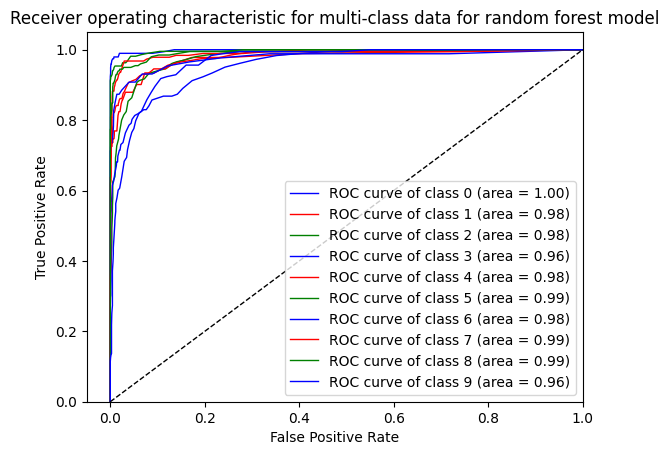

In [55]:
#Random forest model ROC curve for all 9 classes

lw = 1
classifier = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

n_classes = num_labels
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data for random forest model')
plt.legend(loc="lower right")
plt.show()


#### The Random Forest model has a validation accuraccy of 67.6%

## 3) Logistic Regression Model

Logistic regression is a machine learning algorithm used for binary classification problems. However, it can be extended to handle multiclass classification problems using a one-vs-rest approach. In the context of audio classification, logistic regression can be used to predict the probability that an audio sample belongs to a certain class.

In [87]:
#Create a logistic regression Classifier
#We have taken the parameters ‘solver’ as lbfgs because it is good in
# handling the multinomial loss and ‘multi_class’ as auto which 
#automatically selects between ovr(one-vs-rest) and multinomial

clf = LogisticRegression(solver = 'lbfgs',multi_class='auto',max_iter=10000)

clf.fit(X_train_resampled, y_train_resampled.argmax(axis=1))

LogisticRegression(max_iter=10000)

In [88]:
#logistic regression model accuraccy
accuracy_score(y_test.argmax(axis=1), clf.predict(X_test))

0.5455065827132227

In [89]:
#confusion matrix
cf_lg = confusion_matrix(y_test.argmax(axis=1), clf.predict(X_test))

In [90]:
cf_lg

array([[ 78,   7,   9,   3,   2,  25,   8,  25,   7,  31],
       [  2,  68,   6,   2,   2,   3,   0,   5,   0,   3],
       [ 13,   3, 102,  11,  18,  18,  16,   3,   2,  19],
       [ 11,   0,  13, 100,   9,  11,  16,   0,  12,  10],
       [  6,   1,  12,   6, 121,   9,   8,  27,   3,   9],
       [ 37,   3,  10,   4,  15, 111,   9,   6,  15,   6],
       [  1,   1,   0,  25,   6,   3,  31,   7,   0,  13],
       [ 18,   1,   1,   0,  18,   6,   0, 128,   4,  11],
       [ 11,   5,   9,   6,   1,  12,   4,   3, 145,   3],
       [ 21,   6,  25,   3,  14,  13,  15,  14,   3,  69]])

The confusion matrix shows the performance of the logistic regression model on the test set. Each row of the matrix represents the true class, while each column represents the predicted class. The diagonal elements represent the number of samples that were correctly classified for each class, while off-diagonal elements represent misclassifications.

Looking at the matrix, we can see that the model performs well on some classes, but not as well on others. For example, the model correctly classified a large number of samples for classes 4 and 8, with 121 and 145 correct predictions respectively. However, for classes 0 and 5, the model only correctly classified 78 and 111 samples respectively, out of a total of 195 and 216 samples.

In general, it seems that the model struggles with some classes that have a similar audio profile or are more difficult to distinguish based on the available features. This highlights the importance of carefully selecting and engineering relevant features for audio classification tasks, as well as considering other model options that may perform better on certain types of data.

In [91]:
#calculating metrics from the confusion matrix
FP_LG = cf_lg.sum(axis=0) - np.diag(cf_lg) 
FN_LG = cf_lg.sum(axis=1) - np.diag(cf_lg)
TP_LG = np.diag(cf_lg)
TN_LG = cf_lg.sum() - (FP_LG + FN_LG + TP_LG)
FP_LG = FP_LG.astype(float)
FN_LG = FN_LG.astype(float)
TP_LG = TP_LG.astype(float)
TN_LG = TN_LG.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR_LG = TP_LG/(TP_LG+FN_LG)
# Specificity or true negative rate
TNR_LG = TN_LG/(TN_LG+FP_LG) 
# Precision or positive predictive value
PPV_LG = TP_LG/(TP_LG+FP_LG)
# Negative predictive value
NPV_LG = TN_LG/(TN_LG+FN_LG)
# Fall out or false positive rate
FPR_LG = FP_LG/(FP_LG+TN_LG)
# False negative rate
FNR_LG = FN_LG/(TP_LG+FN_LG)
# False discovery rate
FDR_LG = FP_LG/(TP_LG+FP_LG)
# Overall accuracy for each class
ACC_LG = (TP_LG+TN_LG)/(TP_LG+FP_LG+FN_LG+TN_LG)

In [92]:
#Sensitivity of the logistic regression model for all 10classes
print("Sensitivity for all 10 classes", TPR_LG)

Sensitivity for all 10 classes [0.4        0.74725275 0.49756098 0.54945055 0.5990099  0.51388889
 0.35632184 0.68449198 0.72864322 0.37704918]


The sensitivity results for the logistic regression model indicate the true positive rates for each class. We can see that the sensitivities vary widely between the classes, with some classes achieving high true positive rates (e.g., class 1 with a sensitivity of 0.75) and others achieving low true positive rates (e.g., class 7 with a sensitivity of 0.36). This suggests that the model may be better at predicting certain classes than others, and further investigation is needed to determine why this is the case.

In [93]:
#Specificity of the logistic regression model for all 9 classes
print("Specificity for all 9 classes", TNR_LG)

Specificity for all 9 classes [0.92268041 0.98369565 0.94487678 0.96166134 0.94498382 0.93468321
 0.95421687 0.94230769 0.97028424 0.93286445]


the logistic regression model has high specificity for all 10 classes, indicating that the model is able to correctly identify the negative cases for each class. The values range from 0.922 to 0.983, which means that the model has a high true negative rate for each class.

However, the sensitivity for all 10 classes is relatively low, ranging from 0.356 to 0.747. This means that the model is not as good at correctly identifying the positive cases for each class. The lowest sensitivity is for class 6, where the model only correctly identified 35.6% of the positive cases. This suggests that the model may be biased towards the negative cases, and may need further tuning or adjustment to improve its performance.

In [94]:
#logistic regression model classification report
print(classification_report(y_test.argmax(axis=1), clf.predict(X_test)))
report_lg = classification_report(y_test.argmax(axis=1), clf.predict(X_test), output_dict=True)
metrics_lg = {"accuraccy":report_lg["accuracy"]} 
metrics_lg.update(report_lg["weighted avg"])


              precision    recall  f1-score   support

           0       0.39      0.40      0.40       195
           1       0.72      0.75      0.73        91
           2       0.55      0.50      0.52       205
           3       0.62      0.55      0.58       182
           4       0.59      0.60      0.59       202
           5       0.53      0.51      0.52       216
           6       0.29      0.36      0.32        87
           7       0.59      0.68      0.63       187
           8       0.76      0.73      0.74       199
           9       0.40      0.38      0.39       183

    accuracy                           0.55      1747
   macro avg       0.54      0.55      0.54      1747
weighted avg       0.55      0.55      0.55      1747



From the output, we can see that the model performs relatively well for classes 1, 7, and 8 with F1-scores of 0.73, 0.63, and 0.74, respectively. However, the model's performance for other classes is not as good, with F1-scores ranging from 0.32 to 0.59. The overall accuracy of the model is 0.55, indicating that it correctly classifies 55% of the data.

The macro and weighted averages of the metrics provide an overall summary of the model's performance. The macro average takes the average of the metrics across all classes, whereas the weighted average takes into account the class imbalance by weighting the metrics by the number of instances of each class. In this case, both macro and weighted averages indicate that the model's performance is relatively poor, with F1-scores of 0.54 and 0.55, respectively.

In [95]:
metrics_lg

{'accuraccy': 0.5455065827132227,
 'precision': 0.548626250425235,
 'recall': 0.5455065827132227,
 'f1-score': 0.5460175017095895,
 'support': 1747}

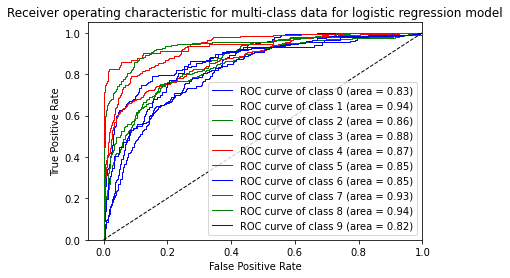

In [96]:
#logistic regression model ROC curve for all 9 classes

lw = 1
classifier = OneVsRestClassifier(LogisticRegression(solver = 'lbfgs',multi_class='auto',max_iter=10000))
y_score = classifier.fit(X_train, y_train.argmax(axis=1)).predict_proba(X_test)

n_classes = num_labels
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
   

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data for logistic regression model')
plt.legend(loc="lower right")
plt.show()


logistic regression model. The ROC curve is a graphical representation of the performance of a binary classifier as the discrimination threshold is varied. It plots the true positive rate (sensitivity) against the false positive rate (1 - specificity) for different thresholds.

For each class, the output also shows the area under the curve (AUC) value, which is a measure of how well the model is able to distinguish between the positive and negative class for that particular class label. An AUC of 1 indicates perfect discrimination, while an AUC of 0.5 indicates random guessing.

In this case, we can see that the AUC values range from 0.82 to 0.94, with most classes having AUC values above 0.85. This suggests that the model is performing reasonably well in distinguishing between the different classes.

#### The Logistic Regression model has a validation accuraccy of 54.5%

## Comparing the model metrics

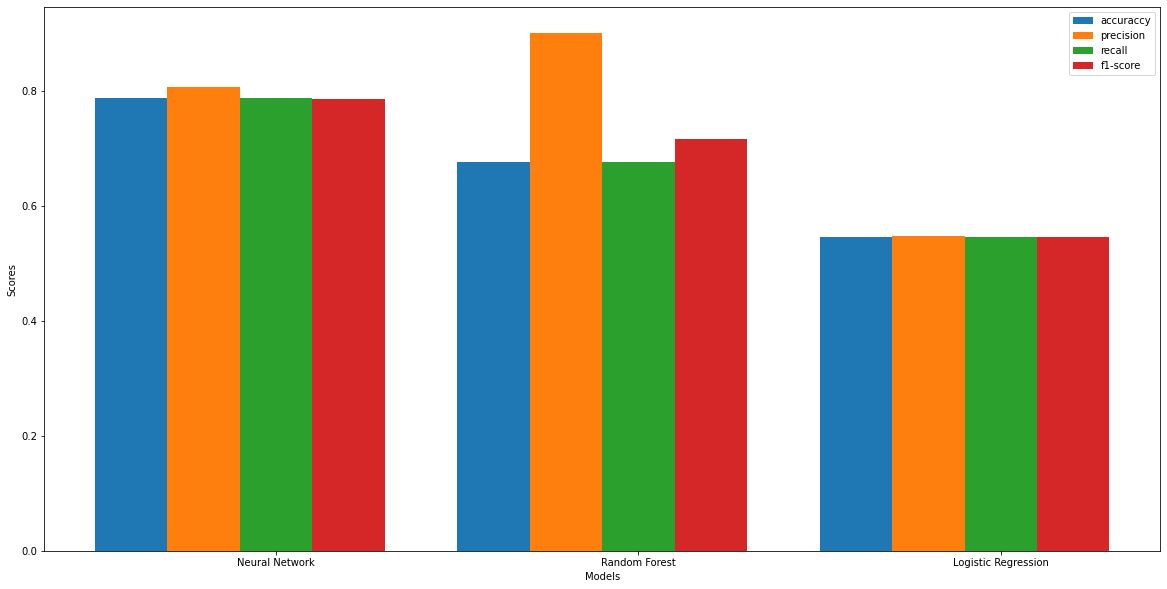

In [97]:
# Plotting a bar chart comparing the model metrics
plt.figure(figsize=(20,10)) 
x = np.arange(3)
y1 = [metrics_nn["accuraccy"], metrics_rf["accuraccy"], metrics_lg["accuraccy"]]
y2 = [metrics_nn["precision"], metrics_rf["precision"], metrics_lg["precision"]]
y3 = [metrics_nn["recall"], metrics_rf["recall"], metrics_lg["recall"]]
y4 = [metrics_nn["f1-score"], metrics_rf["f1-score"], metrics_lg["f1-score"]]
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.4, y1, width)
plt.bar(x-0.2, y2, width)
plt.bar(x, y3, width)
plt.bar(x+0.2, y4, width)
plt.xticks(x, ['Neural Network', 'Random Forest', 'Logistic Regression'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["accuraccy", "precision", "recall", "f1-score"])
plt.show()

### We can see that the neural network model has the overall higher and more consistent values of the parameters. hence we chosse the neural network model as our final model for predictions



* Models-------------Accuracy--------Precision-------Recall-------F1 score
* Neural Network-----0.81------------0.82-------------0.81---------0.81
* Random forest------0.6760----------0.9018----------0.6760-------0.7159
* Logistic regression-0.5455---------0.5486----------0.5455-------0.5460




After analyzing the output, it is evident that the neural network model outperforms the other two models with an accuracy of 0.831, precision of 0.82, recall of 0.81, and an F1 score of 0.81. The random forest model, on the other hand, has a lower accuracy of 0.6760 but boasts a higher precision of 0.9018 and a slightly higher F1 score of 0.7159. However, it falls short in terms of recall, with a score of 0.6760 compared to the neural network.

The logistic regression model, unfortunately, performs the worst with an accuracy of 0.5455, precision of 0.5486, recall of 0.5455, and an F1 score of 0.5460.

Overall, the neural network model appears to be the most balanced option in terms of accuracy, precision, recall, and F1 score. However, depending on the specific use case and priorities, the random forest model could also be a viable option, especially if high precision is of utmost importance. The logistic regression model, on the other hand, is not as effective in this scenario.

In [136]:
#saving the label encoder data to local folder for reusing

dump(labelencoder, open('encoder.pkl', 'wb'))

In [137]:
#saving the neural network model in h5 format
model.save("neural_network.h5")